In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Student_Mental_Health_with_Stability.csv")

# Display the first few rows
data.head()


,Choose your gender,Age,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,Mental Stability
0,Female,18.0,No,Yes,No,Yes,No,Not Stable
1,Male,21.0,No,No,Yes,No,No,Not Stable
2,Male,19.0,No,Yes,Yes,Yes,No,Not Stable
3,Female,22.0,Yes,Yes,No,No,No,Not Stable
4,Male,23.0,No,No,No,No,No,Stable


In [2]:
# Check for missing values
data.isnull().sum()

# Handle missing values (if any)
data.fillna(method='ffill', inplace=True)  # Forward fill method to handle missing data

# Convert categorical variables to numeric using One-Hot Encoding or Label Encoding
# For example, assuming 'Gender' is a categorical column
data = pd.get_dummies(data, drop_first=True)  # One-Hot Encoding for categorical features

# Inspect the dataset again
data.head()


/tmp/ipykernel_2836/3915343624.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill method to handle missing data


,Age,Choose your gender_Male,Marital status_Yes,Do you have Depression?_Yes,Do you have Anxiety?_Yes,Do you have Panic attack?_Yes,Did you seek any specialist for a treatment?_Yes,Mental Stability_Stable
0,18.0,False,False,True,False,True,False,False
1,21.0,True,False,False,True,False,False,False
2,19.0,True,False,True,True,True,False,False
3,22.0,False,True,True,False,False,False,False
4,23.0,True,False,False,False,False,False,True


In [3]:
data.ffill(inplace=True)  # Forward fill method to handle missing data



In [4]:
data.head()

,Age,Choose your gender_Male,Marital status_Yes,Do you have Depression?_Yes,Do you have Anxiety?_Yes,Do you have Panic attack?_Yes,Did you seek any specialist for a treatment?_Yes,Mental Stability_Stable
0,18.0,False,False,True,False,True,False,False
1,21.0,True,False,False,True,False,False,False
2,19.0,True,False,True,True,True,False,False
3,22.0,False,True,True,False,False,False,False
4,23.0,True,False,False,False,False,False,True


In [5]:
# Assume 'Mental_Health' is the target column we want to predict
X = data.drop('Mental Stability_Stable', axis=1)  # Features
y = data['Mental Stability_Stable']  # Target

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [7]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using accuracy, confusion matrix, and classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 100.00%
Confusion Matrix:
[[13  0]
 [ 0  8]]
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        13
        True       1.00      1.00      1.00         8

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [8]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with RandomForest
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Train with grid search
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best Parameters: ", grid_search.best_params_)


Best Parameters:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


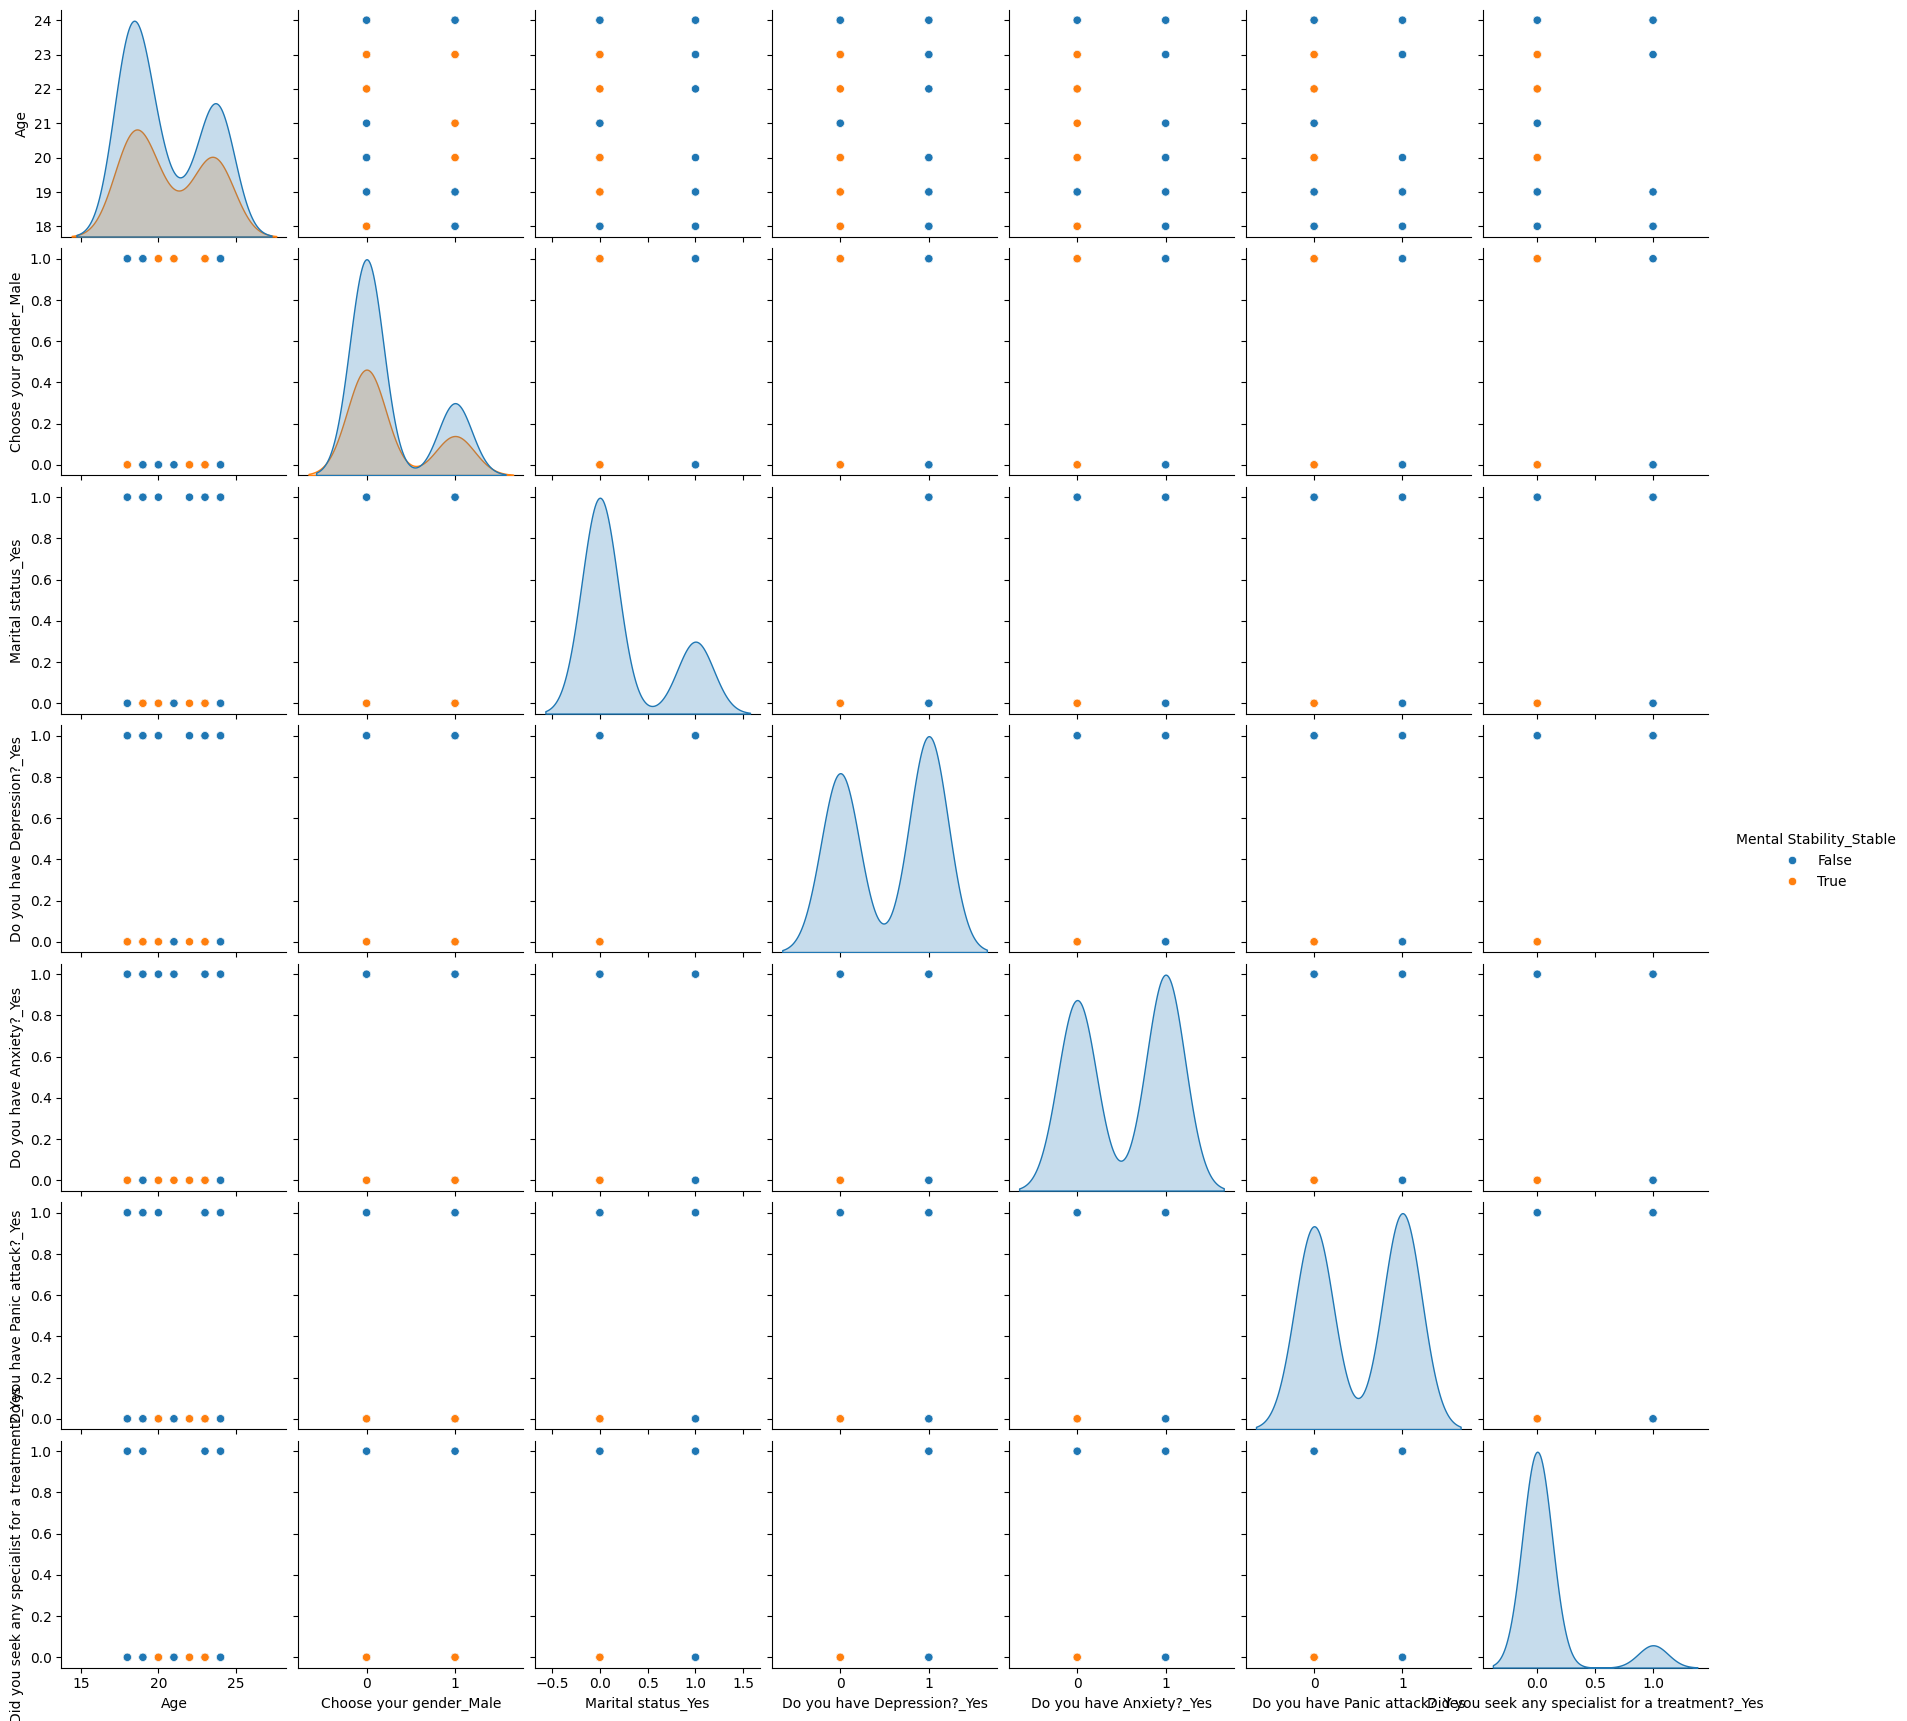

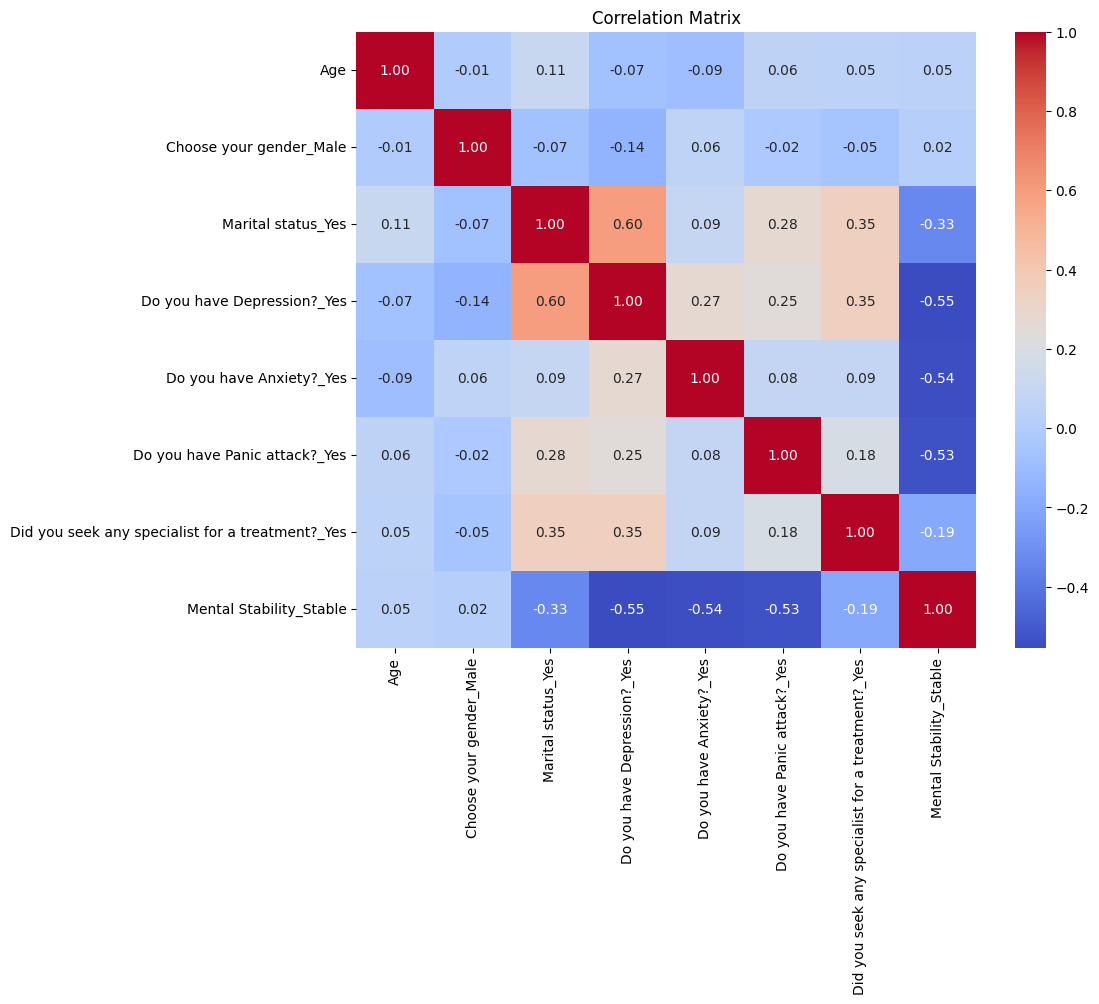

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships between features and mental health
sns.pairplot(data, hue='Mental Stability_Stable')
plt.show()

# Correlation matrix to check feature correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



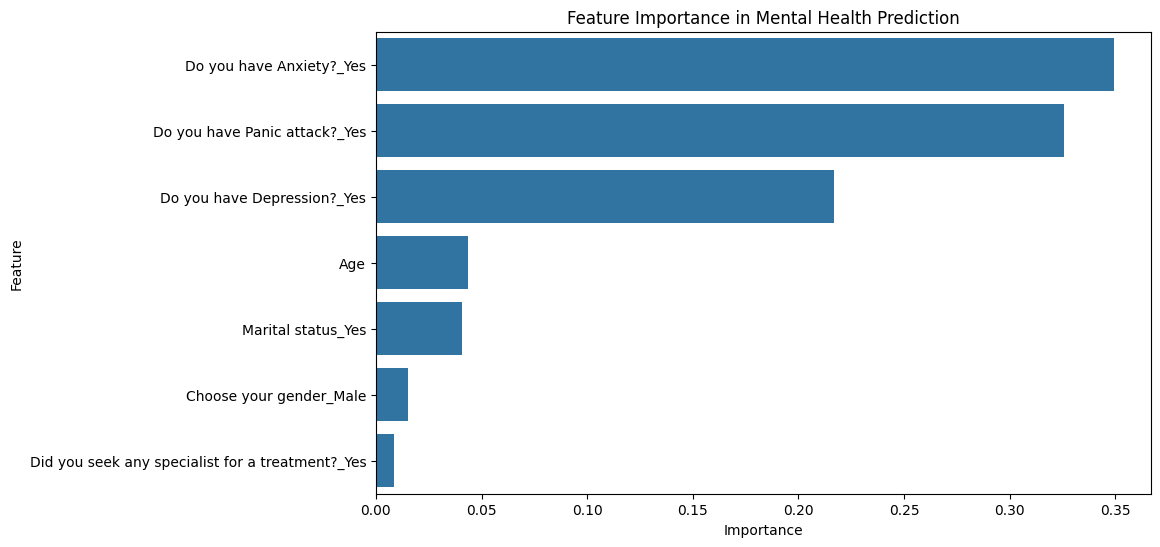

In [10]:
# Get feature importance from the trained Random Forest model
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Mental Health Prediction')
plt.show()


In [11]:
# Import GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define a parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Train GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found by GridSearchCV:", best_params)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min

In [12]:
# Predict on the test set using the best model from GridSearchCV
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Accuracy (Best Model): {accuracy_best * 100:.2f}%')

# Confusion matrix
print('Confusion Matrix (Best Model):')
print(confusion_matrix(y_test, y_pred_best))

# Classification report
print('Classification Report (Best Model):')
print(classification_report(y_test, y_pred_best))



Accuracy (Best Model): 100.00%
Confusion Matrix (Best Model):
[[13  0]
 [ 0  8]]
Classification Report (Best Model):
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        13
        True       1.00      1.00      1.00         8

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [13]:
# Perform 5-fold cross-validation on the best model
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X, y, cv=5)

# Print the cross-validation scores
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean() * 100:.2f}%')



Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 100.00%


In [14]:
import joblib

# Save the trained model to a file
model_filename = 'mental_health_prediction_model.pkl'
joblib.dump(best_model, model_filename)

# Load the model back (if needed)
loaded_model = joblib.load(model_filename)


In [15]:
import numpy as np
import joblib

# Load the trained model
model = joblib.load('mental_health_prediction_model.pkl')


In [16]:
import sqlite3

# Connect to SQLite (creates the database if it doesn't exist)
conn = sqlite3.connect('mental_health.db')
cursor = conn.cursor()

# Create a table to store the data
cursor.execute('''
    CREATE TABLE IF NOT EXISTS mental_health (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        gender TEXT,
        age INTEGER,
        marital_status TEXT,
        depression TEXT,
        anxiety TEXT,
        panic_attack TEXT,
        seeked_specialist TEXT
    )
''')

# Commit changes and close the connection
conn.commit()
print("Database and table created successfully.")


Database and table created successfully.


In [17]:
import pandas as pd

# Load the dataset into a pandas DataFrame
data = {
    'gender': ['Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male'],
    'age': [18, 21, 19, 22, 23, 19, 23, 18, 19, 18],
    'marital_status': ['No']*10,
    'depression': ['Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No'],
    'anxiety': ['No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No'],
    'panic_attack': ['Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
    'seek_specialist': ['No']*10,
}

df = pd.DataFrame(data)

# Insert data into the SQLite database
for _, row in df.iterrows():
    cursor.execute('''
        INSERT INTO mental_health (gender, age, marital_status, depression, anxiety, panic_attack, seeked_specialist)
        VALUES (?, ?, ?, ?, ?, ?, ?)
    ''', tuple(row))

# Commit changes
conn.commit()
print(f"Inserted {cursor.rowcount} rows into the database.")


Inserted 1 rows into the database.


In [18]:
# Query the database to display all records
cursor.execute("SELECT * FROM mental_health")
rows = cursor.fetchall()

# Display the first 5 rows
for row in rows[:5]:
    print(row)

# Close the connection
conn.close()


(1, 'Female', 18, 'No', 'Yes', 'No', 'Yes', 'No')
(2, 'Male', 21, 'No', 'No', 'No', 'Yes', 'No')
(3, 'Male', 19, 'No', 'Yes', 'Yes', 'Yes', 'No')
(4, 'Female', 22, 'No', 'Yes', 'Yes', 'No', 'No')
(5, 'Male', 23, 'No', 'No', 'No', 'No', 'No')


In [19]:
#[age,gender,martial_stats,depresion,anxiety,panic_atck,seeked_treatment]
user_input1 = np.array([[17,1,1,1,0,1,1]])

    #Make prediction
prediction = model.predict(user_input1)

    #Output the result
if prediction[0] == 1:
        print("Prediction: Mental health is stable.")
else:
        print("Prediction: Mental health is not stable.\nTHE SUGGESTIONS ARE:\n1.Seek immediate help from a mental health specialist. \n2.Consider therapy, counseling, or medication as recommended by a professional.\n3.Stay connected with supportive friends and family.")


Prediction: Mental health is not stable.
THE SUGGESTIONS ARE:
1.Seek immediate help from a mental health specialist. 
2.Consider therapy, counseling, or medication as recommended by a professional.
3.Stay connected with supportive friends and family.


/home/jovyan/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [20]:
#[age,gender,martial_stats,depresion,anxiety,panic_atck,seeked_treatment]
user_input1 = np.array([[17,1,0,0,0,0,0]])

    #Make prediction
prediction = model.predict(user_input1)

    #Output the result
if prediction[0] == 1:
        print("Prediction: Mental health is stable.")
else:
        print("Prediction: Mental health is not stable.\nTHE SUGGESTIONS ARE:\n1.Seek immediate help from a mental health specialist. \n2.Consider therapy, counseling, or medication as recommended by a professional.\n3.Stay connected with supportive friends and family.")


Prediction: Mental health is stable.


/home/jovyan/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
